##**Project name: Product Personalisation** 

**Problem Statement :** Predict which offers will be most attractive to each individual customer, resulting in more targeted marketing campaigns and higher brand value.

**Group name: Machine Learning-6**

#**Importing Essential Libraries**


In [ ]:
import pandas as pd   # data preprocesing
import  numpy as np   #linear algbra
import matplotlib.pyplot as plt  # data visualization
import seaborn as sns  
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
import warnings
import plotly.express as ex
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import pickle

#**Loading the Data**

In [ ]:
dataset=pd.read_csv('marketing_data.csv')  #reading the dataset

In [ ]:
dataset.head()   #displaying top five rows in the dataset

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,05-11-2014,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,04-08-2014,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


In [ ]:
dataset.shape  #size of the dataset

(2240, 28)

In [ ]:
dataset.columns  #columns for the dataset

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [ ]:
dataset.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [ ]:
# displaying null values and unique values in the dataset
temp=pd.DataFrame({'null_values': dataset.isnull().sum(),'number_of_unique values' : dataset.nunique()})
temp

,null_values,number_of_unique values
ID,0,2240
Year_Birth,0,59
Education,0,5
Marital_Status,0,8
Income,24,1974
Kidhome,0,3
Teenhome,0,3
Dt_Customer,0,663
Recency,0,100
MntWines,0,776


In [ ]:
dataset.dtypes   #datatype of columns

ID                      int64
Year_Birth              int64
Education              object
Marital_Status         object
 Income                object
Kidhome                 int64
Teenhome                int64
Dt_Customer            object
Recency                 int64
MntWines                int64
MntFruits               int64
MntMeatProducts         int64
MntFishProducts         int64
MntSweetProducts        int64
MntGoldProds            int64
NumDealsPurchases       int64
NumWebPurchases         int64
NumCatalogPurchases     int64
NumStorePurchases       int64
NumWebVisitsMonth       int64
AcceptedCmp3            int64
AcceptedCmp4            int64
AcceptedCmp5            int64
AcceptedCmp1            int64
AcceptedCmp2            int64
Response                int64
Complain                int64
Country                object
dtype: object

In [ ]:
dataset.drop(columns=['ID','Year_Birth','Dt_Customer'],axis=1,inplace=True)
dataset.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,Graduation,Divorced,"$84,835.00",0,0,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,Graduation,Single,"$57,091.00",0,0,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,Graduation,Married,"$67,267.00",0,1,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,Graduation,Together,"$32,474.00",1,1,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,Graduation,Single,"$21,474.00",1,0,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


#####**Describe Function is useful to get information about the categorical as well as the continous variable mainly about the continous variables.**

In [ ]:
dataset.describe()

,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# sum of the numbers and divide to number by amount of the numbers
dataset.mean()

Kidhome                  0.444196
Teenhome                 0.506250
Recency                 49.109375
MntWines               303.935714
MntFruits               26.302232
MntMeatProducts        166.950000
MntFishProducts         37.525446
MntSweetProducts        27.062946
MntGoldProds            44.021875
NumDealsPurchases        2.325000
NumWebPurchases          4.084821
NumCatalogPurchases      2.662054
NumStorePurchases        5.790179
NumWebVisitsMonth        5.316518
AcceptedCmp3             0.072768
AcceptedCmp4             0.074554
AcceptedCmp5             0.072768
AcceptedCmp1             0.064286
AcceptedCmp2             0.013393
Response                 0.149107
Complain                 0.009375
dtype: float64

In [ ]:
#Middle of the point
dataset.median()

Kidhome                  0.0
Teenhome                 0.0
Recency                 49.0
MntWines               173.5
MntFruits                8.0
MntMeatProducts         67.0
MntFishProducts         12.0
MntSweetProducts         8.0
MntGoldProds            24.0
NumDealsPurchases        2.0
NumWebPurchases          4.0
NumCatalogPurchases      2.0
NumStorePurchases        5.0
NumWebVisitsMonth        6.0
AcceptedCmp3             0.0
AcceptedCmp4             0.0
AcceptedCmp5             0.0
AcceptedCmp1             0.0
AcceptedCmp2             0.0
Response                 0.0
Complain                 0.0
dtype: float64

In [ ]:
#we want to clean the some attributes in columns
dataset.columns = dataset.columns.str.replace(' ', '')

dataset['Income'] = dataset['Income'].str.replace('$', '')
dataset['Income']=dataset['Income'].str.replace(',','').astype('float')

In [ ]:
dataset.head(5)

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,Graduation,Divorced,84835.0,0,0,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,Graduation,Single,57091.0,0,0,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,Graduation,Married,67267.0,0,1,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,Graduation,Together,32474.0,1,1,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,Graduation,Single,21474.0,1,0,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


In [ ]:
##dived the target with 1 and o
target=dataset[dataset['Response']==1]
non_target=dataset[dataset['Response']==0]

In [ ]:
#we use this part for analyzing the data based on response
target_cols=['Response']
cat_cols=dataset.nunique()[dataset.nunique()<6].keys().tolist()
cat_cols=[x for x in cat_cols if x not in target_cols]
num_col=[x for x in dataset.columns if x not in cat_cols+ target_cols]

In [ ]:
#the highest part is for graducation and lowest is for basic
dataset['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [ ]:
#Most of then people are married and the Yolo has the lowest portion
dataset['Marital_Status'].value_counts(normalize=True)*100

Married     38.571429
Together    25.892857
Single      21.428571
Divorced    10.357143
Widow        3.437500
Alone        0.133929
YOLO         0.089286
Absurd       0.089286
Name: Marital_Status, dtype: float64

In [ ]:
#we use filter to understand the number of people who are get married and their salary is more than 80000$
dataset[(dataset['Marital_Status']=='Married')& (dataset['Income']>80000)]

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
10,2n Cycle,Married,81044.0,0,0,0,450,26,535,73,98,26,1,5,6,10,1,0,0,0,0,0,0,0,US
53,Graduation,Married,90369.0,0,0,2,292,51,981,224,23,17,1,4,6,6,1,0,0,0,0,0,1,0,SP
58,Graduation,Married,83715.0,0,0,2,318,8,407,150,35,8,1,2,8,13,0,0,0,0,0,0,0,0,SA
67,2n Cycle,Married,82504.0,0,0,2,362,50,431,134,35,54,1,3,6,7,1,0,0,0,0,0,0,0,IND
98,Graduation,Married,80011.0,0,1,3,421,76,536,82,178,102,2,8,6,5,4,0,0,0,0,0,0,0,AUS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2166,PhD,Married,84618.0,0,0,96,684,100,801,21,66,0,1,6,9,10,2,0,0,1,0,0,0,0,AUS
2167,PhD,Married,84618.0,0,0,96,684,100,801,21,66,0,1,6,9,10,2,0,0,1,0,0,0,0,SP
2192,Graduation,Married,93404.0,1,2,97,1279,15,287,20,0,15,3,3,4,7,5,0,1,1,0,0,0,0,CA
2204,PhD,Married,157243.0,0,1,98,20,2,1582,1,2,1,15,0,22,0,0,0,0,0,0,0,0,0,IND


In [ ]:
dataset[(dataset['Complain']==1)&(dataset['Response']==1)]

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
662,Graduation,Single,37774.0,2,0,28,173,8,107,7,2,176,4,7,2,3,9,1,0,0,0,0,1,1,SP
943,PhD,Single,39684.0,1,0,41,19,0,35,6,4,17,2,2,1,2,7,0,0,0,0,0,1,1,SP
1298,2n Cycle,Single,83257.0,0,0,56,536,27,590,38,107,67,1,5,10,12,6,1,0,1,0,0,1,1,SP


In [ ]:
dataset['Education'].unique()
Education_MntWines=pd.crosstab(dataset['Education'],dataset['MntWines'])
Education_MntWines

MntWines,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1181,1184,1193,1200,1205,1206,1215,1218,1224,1230,1239,1241,1245,1248,1252,1253,1259,1276,1279,1285,1288,1296,1298,1302,1308,1311,1315,1324,1332,1349,1379,1394,1396,1449,1459,1462,1478,1486,1492,1493
Education,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2n Cycle,4,6,9,3,6,8,4,3,7,3,4,5,7,2,0,2,2,0,0,1,1,1,2,2,1,2,1,1,1,0,2,2,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Basic,6,16,10,3,5,2,4,3,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Graduation,3,15,20,21,18,24,19,11,13,14,16,12,12,8,13,11,8,5,12,9,4,2,10,9,7,8,1,5,5,8,7,4,6,4,6,3,3,2,2,5,...,0,0,0,0,0,0,0,2,1,1,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,2,0
Master,0,0,2,3,1,3,6,3,7,6,0,2,5,2,4,3,3,2,3,3,0,1,1,3,2,1,3,2,2,3,5,2,0,1,3,2,1,3,1,2,...,0,2,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
PhD,0,0,1,0,3,3,4,2,2,4,3,4,1,2,7,6,3,2,3,8,6,2,3,4,2,3,5,3,2,3,2,1,1,1,0,4,0,3,5,1,...,3,0,0,1,0,0,0,1,0,0,1,0,1,1,1,1,0,0,0,3,0,0,0,0,1,1,1,0,1,1,0,0,1,0,1,1,2,0,0,1


In [ ]:
dataset['Response'].unique()
Response_Marital_Status=pd.crosstab(dataset['Response'],dataset['Marital_Status'])
Response_Marital_Status

Marital_Status,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
Response,,,,,,,,
0,1,2,184,766,374,520,58,1
1,1,1,48,98,106,60,19,1


In [ ]:
dataset['Total Spent'] = (dataset['MntFishProducts'] + dataset['MntWines'] + dataset['MntSweetProducts']
                       + dataset['MntFruits'] + dataset['MntMeatProducts'] + dataset['MntGoldProds'] )
dataset['Total Purchase']=(dataset['NumDealsPurchases']+dataset['NumWebPurchases']+dataset['NumStorePurchases']+dataset['NumCatalogPurchases'])

In [ ]:
dataset.head(5)

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Total Spent,Total Purchase
0,Graduation,Divorced,84835.0,0,0,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,1190,15
1,Graduation,Single,57091.0,0,0,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,577,18
2,Graduation,Married,67267.0,0,1,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,251,11
3,Graduation,Together,32474.0,1,1,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,11,4
4,Graduation,Single,21474.0,1,0,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,91,8


In [ ]:
#we want to use the groupby with sum and count with Countries
dataset_grouped_sum=dataset.groupby('Marital_Status',as_index=False)['Income'].agg('sum').rename(columns={'Income':'Income_Sum'})
dataset_grouped_cnt=dataset.groupby('Marital_Status',as_index=False)['Income'].agg('count').rename(columns={'Income':'Income_Count'})

# now we want ro the merge these 2 lines
dataset_grouped_Salary=dataset_grouped_sum.merge(dataset_grouped_cnt,left_on='Marital_Status',right_on='Marital_Status',how='inner')
#now we want to calculate the average salary
dataset_grouped_Salary.loc[:,'Average of Salary']=dataset_grouped_Salary['Income_Sum']/dataset_grouped_Salary['Income_Count']

dataset_grouped_Salary.sort_values('Income_Sum',ascending=False)

,Marital_Status,Income_Sum,Income_Count,Average of Salary
3,Married,44328307.0,857,51724.978996
5,Together,30509691.0,573,53245.534031
4,Single,24018810.0,471,50995.350318
2,Divorced,12257541.0,232,52834.228448
6,Widow,4292598.0,76,56481.552632
0,Absurd,144731.0,2,72365.500000
1,Alone,131367.0,3,43789.000000
7,YOLO,96864.0,2,48432.000000


In [ ]:
dataset_grouped_sum=dataset.groupby('Country',as_index=False)['Income'].agg('sum').rename(columns={'Income':'Income_Sum'})
dataset_grouped_cnt=dataset.groupby('Country',as_index=False)['Income'].agg('count').rename(columns={'Income':'Income_Count'})
#niw we merge these 2 codes
dataset_grouped_Salary=dataset_grouped_sum.merge(dataset_grouped_cnt,left_on='Country',right_on='Country',how='inner')
#calculate the average 
dataset_grouped_Salary.loc[:,'Average of Salary']=dataset_grouped_Salary['Income_Sum']/dataset_grouped_Salary['Income_Count']
dataset_grouped_Salary.sort_values('Income_Sum',ascending=False)

,Country,Income_Sum,Income_Count,Average of Salary
6,SP,56360083.0,1093,51564.577310
5,SA,18477985.0,337,54830.816024
1,CA,14111464.0,266,53050.616541
0,AUS,7615230.0,147,51804.285714
3,IND,7205413.0,147,49016.414966
2,GER,6142327.0,116,52951.094828
7,US,5694366.0,107,53218.373832
4,ME,173041.0,3,57680.333333


In [ ]:
 dataset.drop(columns=['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain'])

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Country,Total Spent,Total Purchase
0,Graduation,Divorced,84835.0,0,0,0,189,104,379,111,189,218,1,4,4,6,1,SP,1190,15
1,Graduation,Single,57091.0,0,0,0,464,5,64,7,0,37,1,7,3,7,5,CA,577,18
2,Graduation,Married,67267.0,0,1,0,134,11,59,15,2,30,1,3,2,5,2,US,251,11
3,Graduation,Together,32474.0,1,1,0,10,0,1,0,0,0,1,1,0,2,7,AUS,11,4
4,Graduation,Single,21474.0,1,0,0,6,16,24,11,0,34,2,3,1,2,7,SP,91,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,PhD,Divorced,66476.0,0,1,99,372,18,126,47,48,78,2,5,2,11,4,US,689,20
2236,2n Cycle,Married,31056.0,1,0,99,5,10,13,3,8,16,1,1,0,3,8,SP,55,5
2237,Graduation,Divorced,46310.0,1,0,99,185,2,88,15,5,14,2,6,1,5,8,SP,309,14
2238,Graduation,Married,65819.0,0,0,99,267,38,701,149,165,63,1,5,4,10,3,IND,1383,20


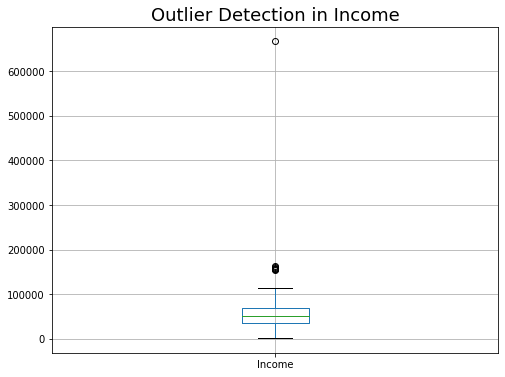

In [ ]:
#Outlier detection using boxplot in Income
num_cols = ['Income']
plt.figure(figsize=(8,6))
dataset[num_cols].boxplot()
plt.title("Outlier Detection in Income", fontsize=18)
plt.show()

In [ ]:
#Replacing outliers in Income with the mean Income value
dataset.loc[dataset['Income'] > 130000,'Income']=np.mean(dataset['Income'])

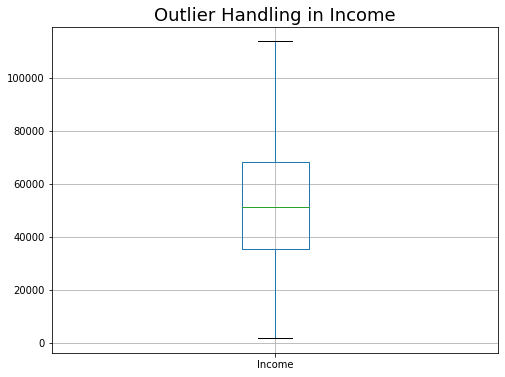

In [ ]:
#Outlier Handling using boxplot in Income
num_cols = ['Income']
plt.figure(figsize=(8,6))
dataset[num_cols].boxplot()
plt.title("Outlier Handling in Income", fontsize=18)
plt.show()

# **Data Visualization**

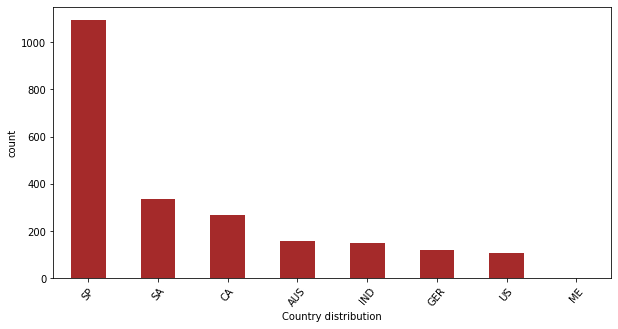

In [ ]:
plt.rcParams['figure.figsize']=(10,5)
dataset['Country'].value_counts().sort_values(ascending=False).plot.bar(color='brown')
plt.xlabel('Country distribution')
plt.ylabel('count')
plt.xticks(rotation=50)
plt.show()

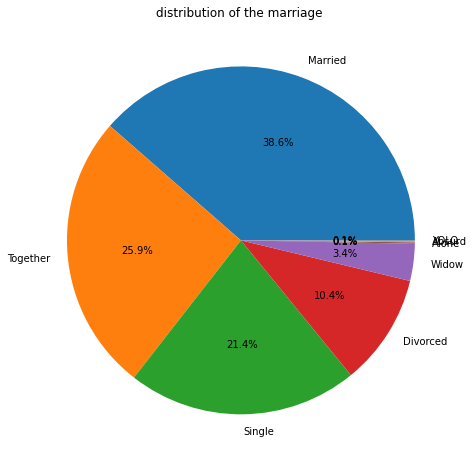

In [ ]:
plt.rcParams['figure.figsize']=(30,8)
dataset['Marital_Status'].value_counts().sort_values(ascending=False).plot.pie(y='Marital_Status',autopct="%0.1f%%")
plt.title('distribution of the marriage ')
plt.axis('off')
plt.show() #married has the highest percent with almost 39

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



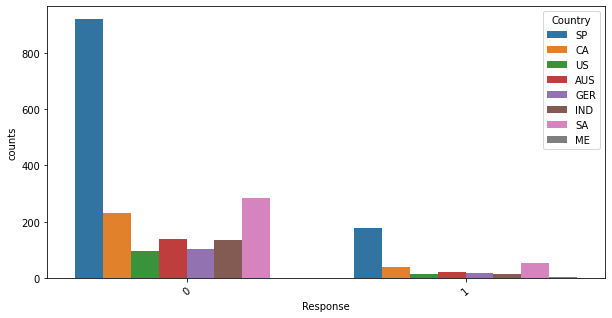

In [ ]:
fig,ax=plt.subplots(figsize=(10,5))
sns.countplot(dataset['Response'],hue=dataset['Country'],ax=ax)
plt.xlabel('Response')
plt.ylabel('counts')
plt.xticks(rotation=40)
plt.show()

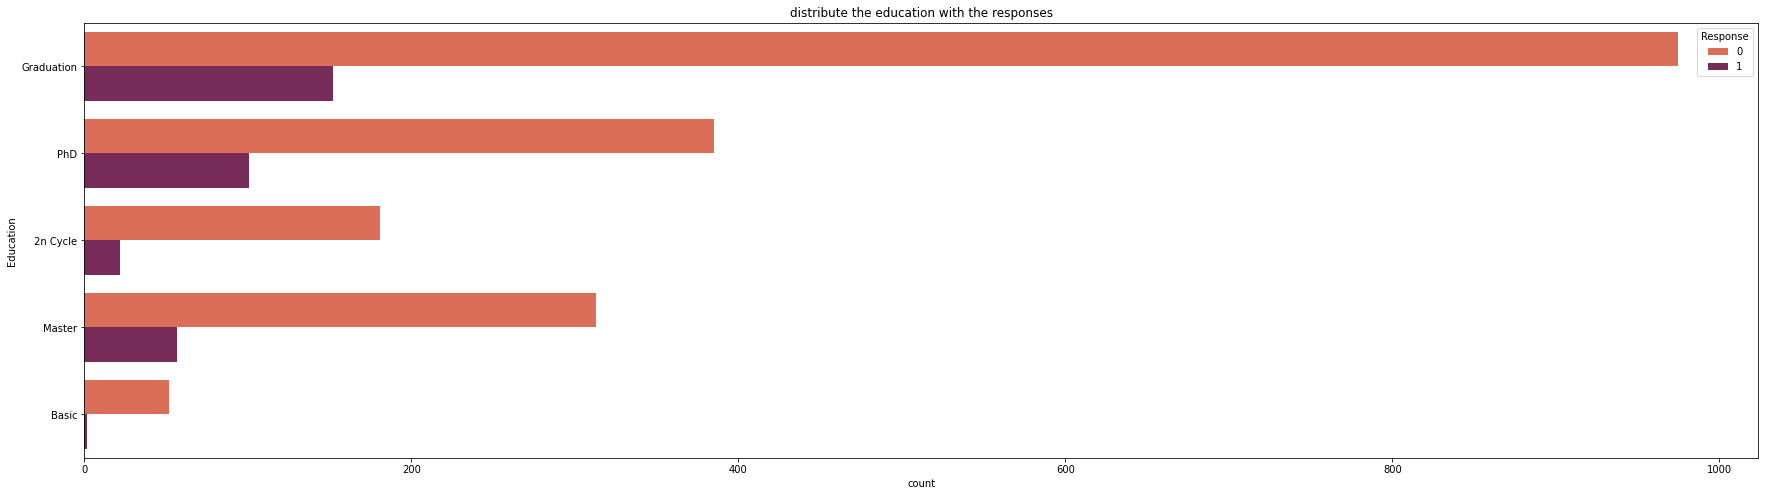

<Figure size 720x360 with 0 Axes>

In [ ]:
sns.countplot(data=dataset,y='Education',hue='Response',palette='rocket_r')
plt.title('distribute the education with the responses')
plt.figure(figsize=(10,5))
plt.show()

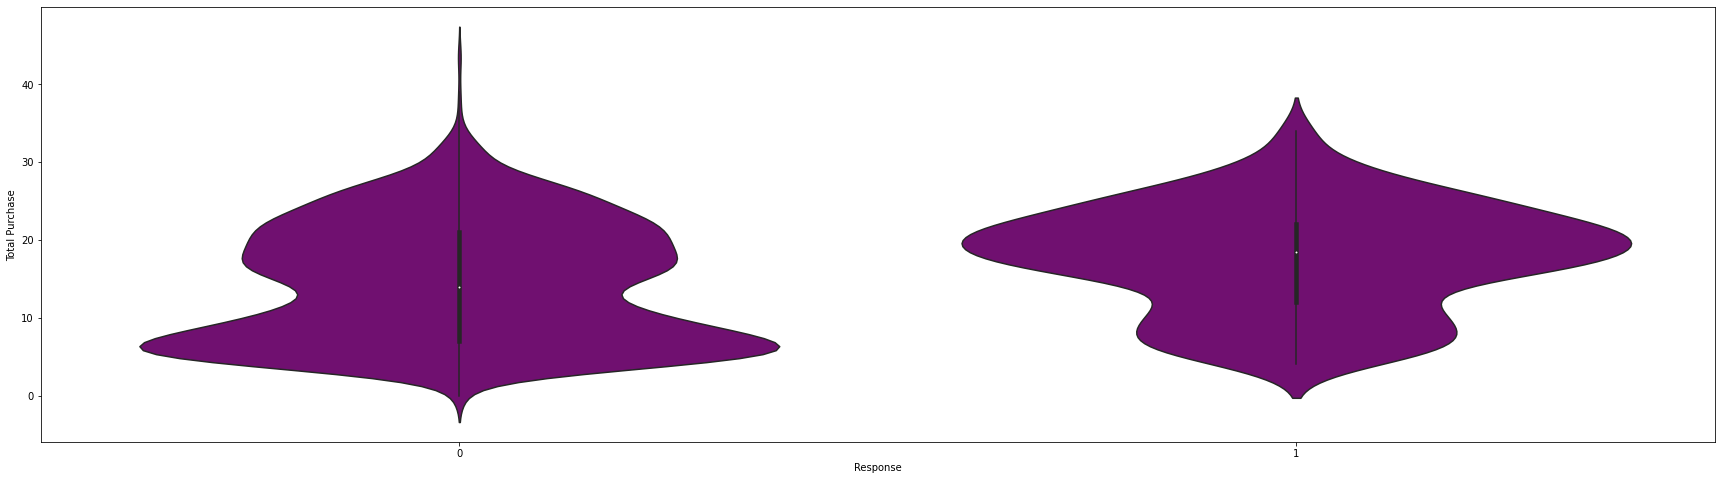

In [ ]:
# in the graph below, the total purchase for the response one is more that zero
sns.violinplot(y='Total Purchase',x='Response',data=dataset,color='purple')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



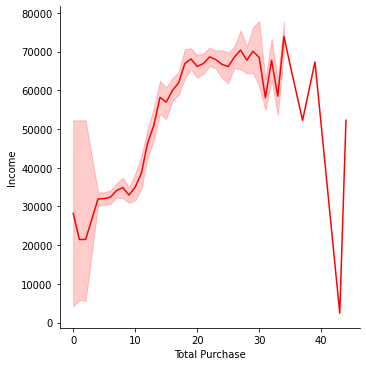

In [ ]:
# in the graph, as you see, the highest part is for total purchase more than 40 and Income about 160000$
sns.relplot('Total Purchase','Income',data=dataset,color='red',kind='line')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



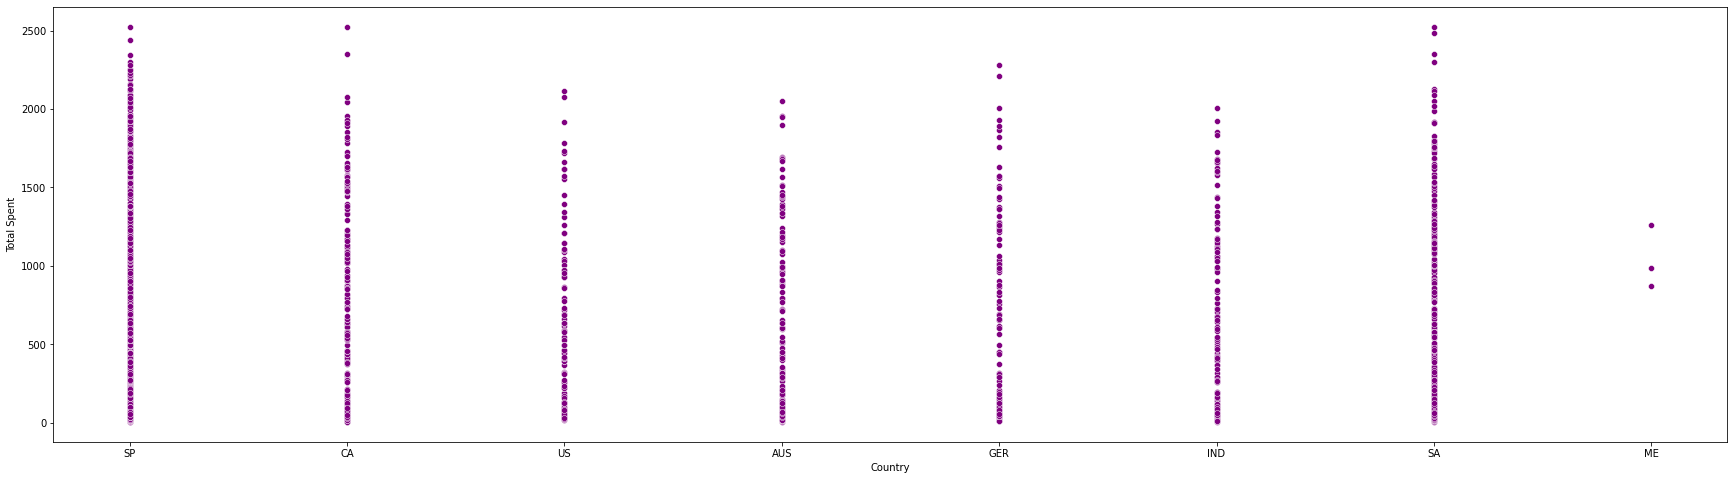

In [ ]:
sns.scatterplot('Country','Total Spent',data=dataset,color='purple')
plt.show()# the highest spent is for spain and singapore and the lowest is for Mexico

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



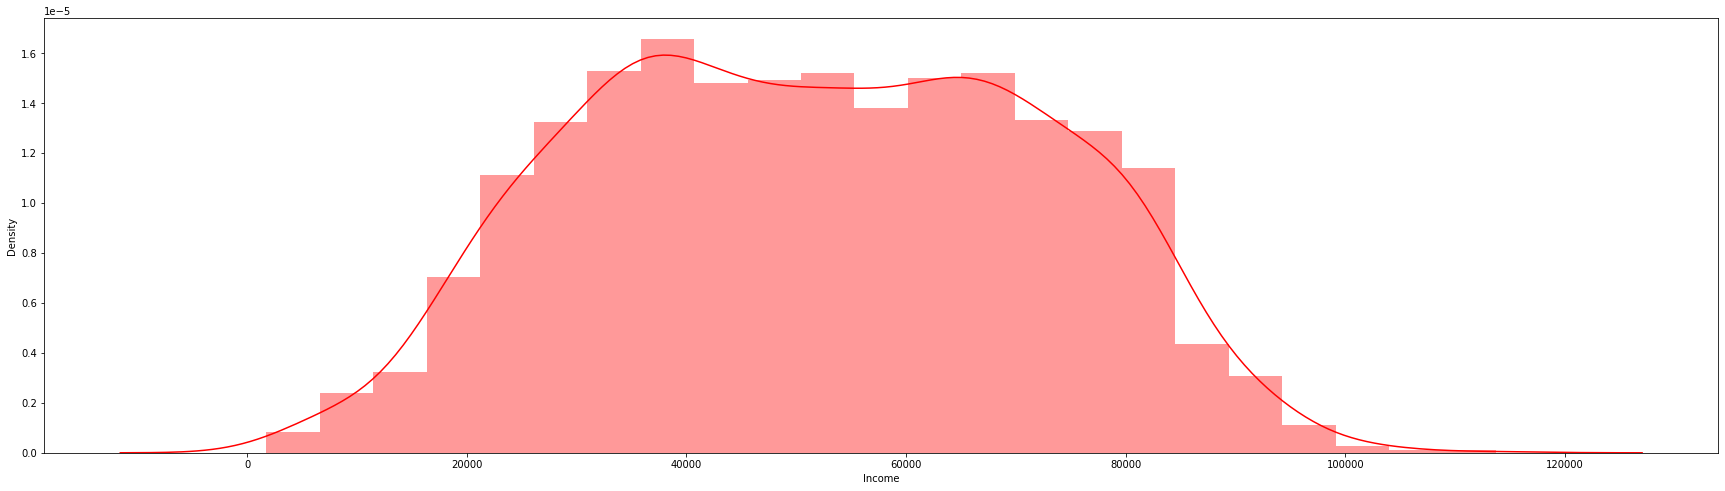

In [ ]:
#the range of the income 
sns.distplot(dataset['Income'], color = 'red')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



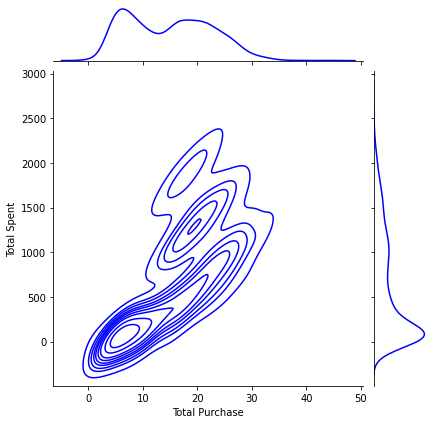

In [ ]:
#the total purchase feom zero to 10 and toal spent from zero to 500 has the highest portion
sns.jointplot('Total Purchase','Total Spent',data=dataset,color='blue',kind='kde')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 0, 'Total Amount Spent  ')

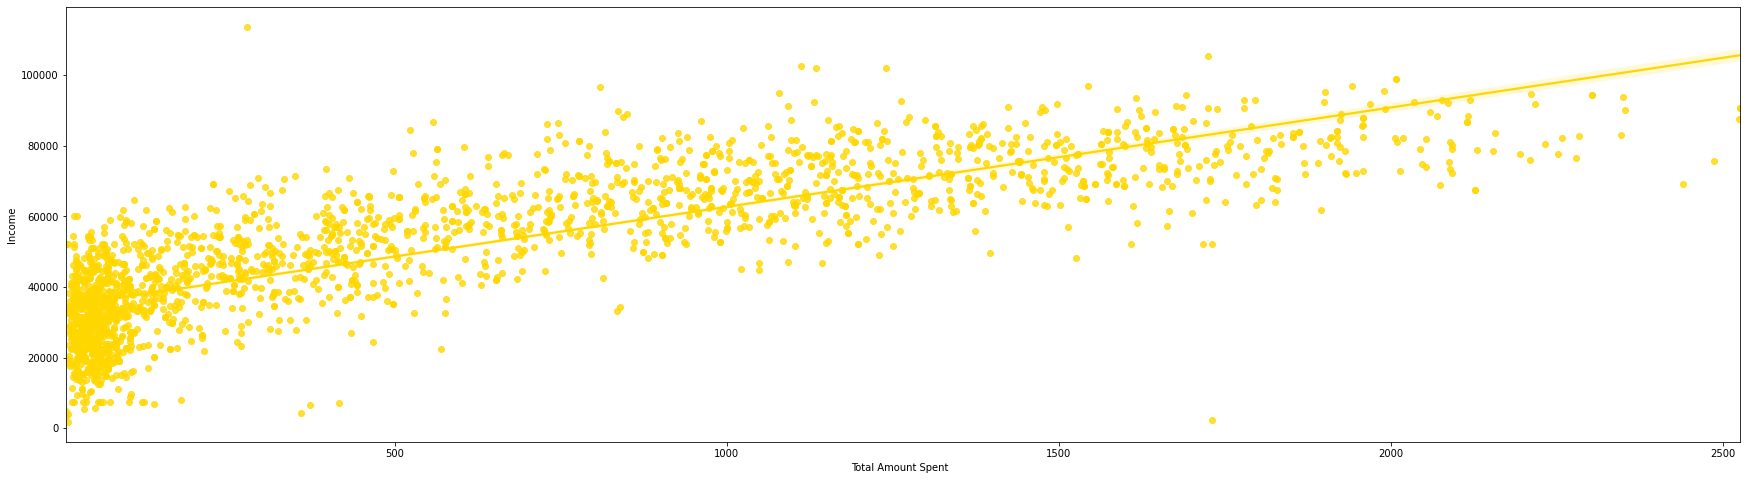

In [ ]:
sns.regplot('Total Spent','Income',data=dataset,color='gold')
plt.xlabel('Total Amount Spent  ')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



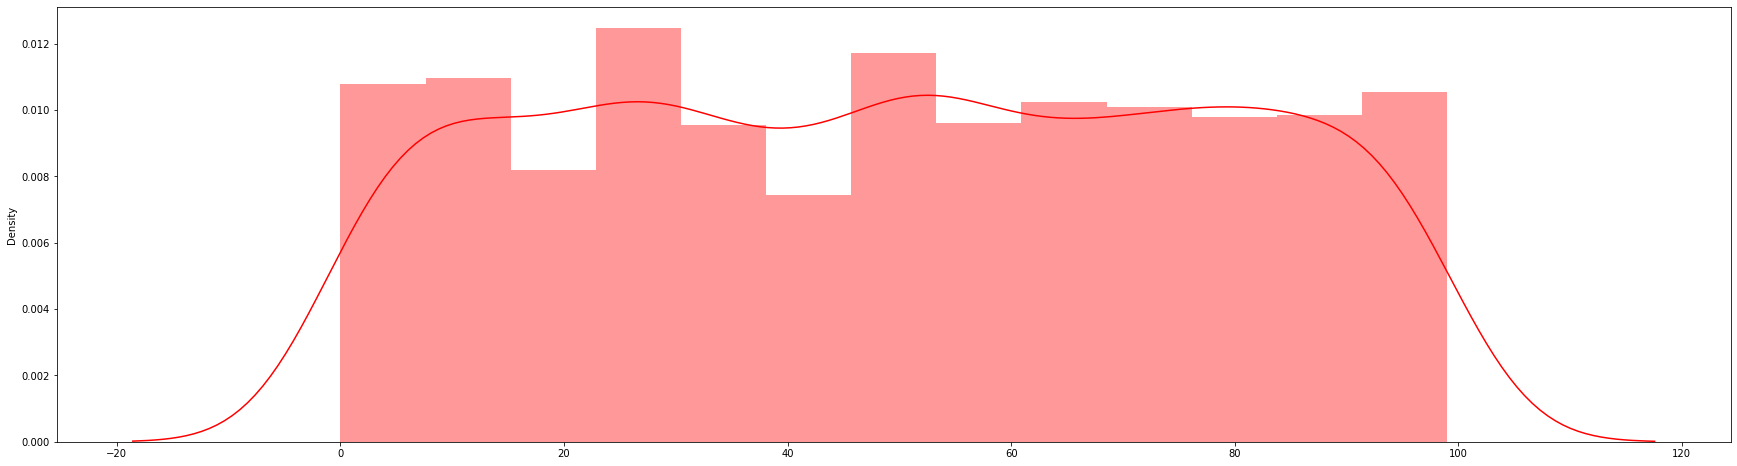

In [ ]:
sns.distplot(x=dataset['Recency'],color='r')

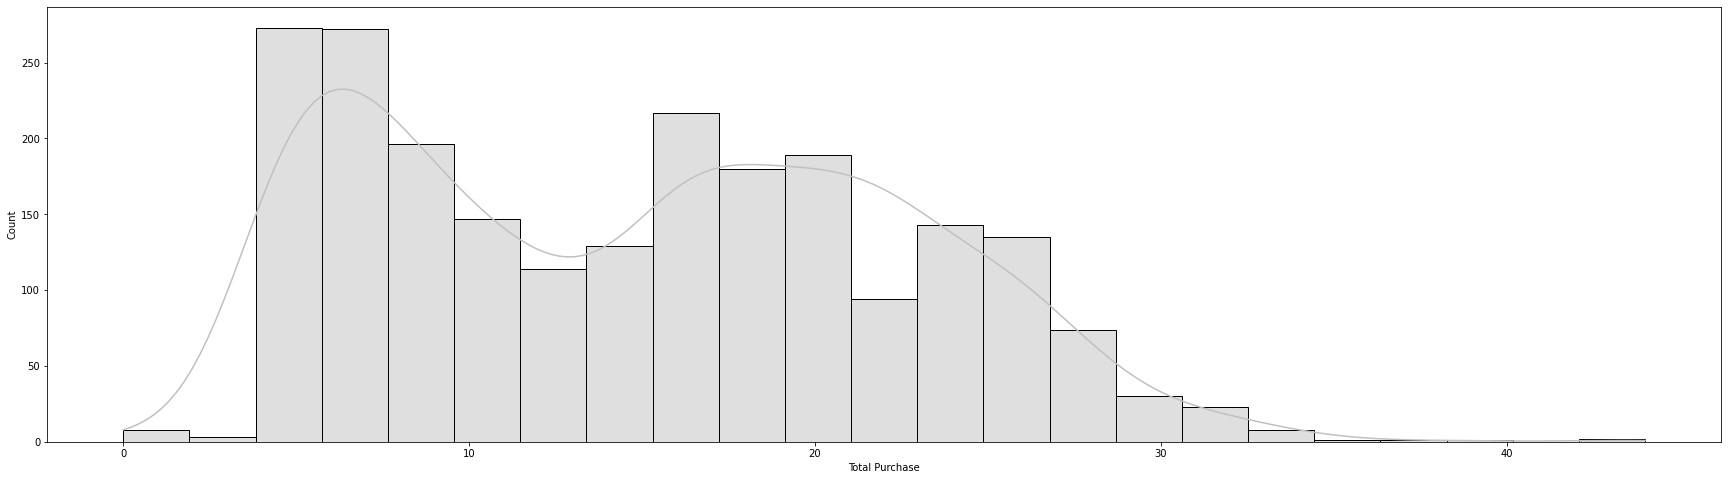

In [ ]:
sns.histplot(dataset['Total Purchase'],kde=True,color='silver')

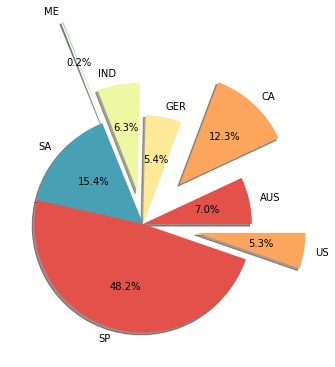

In [ ]:
pm = dataset[['Total Purchase', 'Country']].groupby(['Country']).agg([sum])

sns.set_palette('Spectral')
plt.figure(figsize=(10,5))
plt.pie(pm['Total Purchase']['sum'], labels = pm.index, explode = (0, 0.5, 0, 0.3, 1, 0, 0, 0.5),  shadow = True, autopct = '%1.1f%%')
plt.show()

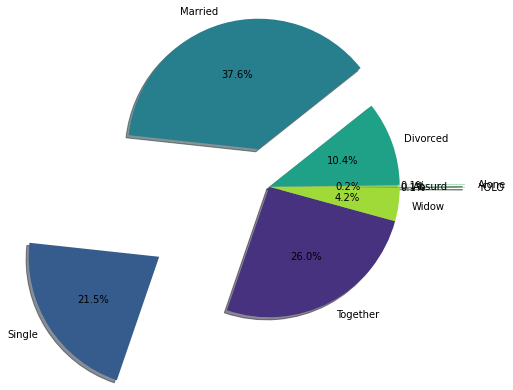

In [ ]:
pm=dataset[['Total Spent', 'Marital_Status']].groupby(['Marital_Status']).agg([sum])

sns.set_palette('viridis_r')
plt.figure(figsize=(10,6))
plt.pie(pm['Total Spent']['sum'], labels=pm.index, explode=(0, 0.5, 0, 0.3, 1, 0, 0, 0.5), shadow=True,autopct='%1.1f%%')
plt.show()

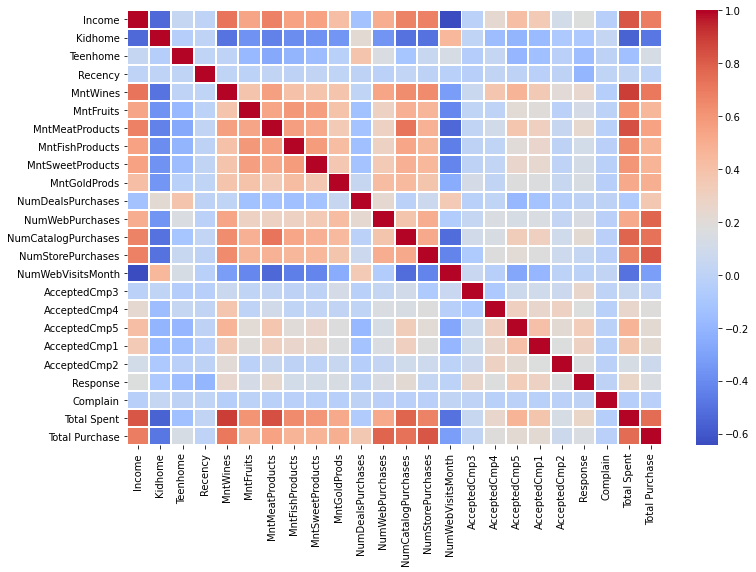

In [ ]:
plt.figure(figsize = (12, 8))
corr = dataset.corr()
sns.heatmap(corr, linecolor = 'white', linewidths = 1, cmap = 'coolwarm')
plt.show()

##**Dealing with the missing values**

In [ ]:
#missing values from the dataset
dataset.isnull().sum()  

Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
Total Spent             0
Total Purchase          0
dtype: int64

**Handling the missing values using SimpleImputer**


In [ ]:
#handling missing data (Replacing missing data with the mean value)  
imputer= SimpleImputer(missing_values=np.NAN,strategy='mean',fill_value=None, verbose=1, copy=True)
imputer= imputer.fit(dataset[['Income']])
dataset[['Income']]=imputer.transform(dataset[['Income']])

In [ ]:
dataset.isnull().sum()  

Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
Total Spent            0
Total Purchase         0
dtype: int64

###**Segregating the Dependent and Independent variables**

In [ ]:
#Seperate features from the dataset
features=dataset.drop(["Response","Income","Total Spent","Total Purchase","Recency","Complain","Teenhome"], axis = 1)

In [ ]:
features.head()

,Education,Marital_Status,Kidhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Country
0,Graduation,Divorced,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,SP
1,Graduation,Single,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,CA
2,Graduation,Married,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,US
3,Graduation,Together,1,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,AUS
4,Graduation,Single,1,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,SP


In [ ]:
features.shape

(2240, 20)

In [ ]:
#Seperate labels from the dataset
labels=dataset[['Response']]
labels=np.array(labels,dtype='int64').ravel()

In [ ]:
labels

array([1, 1, 0, ..., 0, 0, 1])

In [ ]:
labels.shape

(2240,)

###**Encoding Categorical data using OneHotEncoding**

In [ ]:
# Encoding the Features 
encoder=ColumnTransformer([('encoder',OneHotEncoder(), [0,1,19])],remainder='passthrough')
features=encoder.fit_transform(features)

In [ ]:
features

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [ ]:
dataset['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

In [ ]:
dataset['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [ ]:
dataset['Country'].value_counts()

SP     1095
SA      337
CA      268
AUS     160
IND     148
GER     120
US      109
ME        3
Name: Country, dtype: int64

In [ ]:
features[0]

array([  0.,   0.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
       189., 104., 379., 111., 189., 218.,   1.,   4.,   4.,   6.,   1.,
         0.,   0.,   0.,   0.,   0.])

**Removing redundancy columns from the features**


In [ ]:
features.shape

(2240, 38)

In [ ]:
temp1=features[:, 1:5]

In [ ]:
temp1.shape

(2240, 4)

In [ ]:
temp2=features[:, 6:13]

In [ ]:
temp2.shape

(2240, 7)

In [ ]:
temp3=features[:, 14:]

In [ ]:
temp3.shape

(2240, 24)

In [ ]:
features=np.concatenate((temp1,temp2,temp3), axis=1)

In [ ]:
features

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [ ]:
features.shape

(2240, 35)

**Splitting the dataset into the Training set and Test set**

In [ ]:
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size = 0.2, random_state=42)

In [ ]:
features_train.shape

(1792, 35)

In [ ]:
features_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [ ]:
labels_train.shape

(1792,)

In [ ]:
labels_test

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,

##PCA

Step 1- Standarlization

In [ ]:
scaler = StandardScaler()
features_train = scaler.fit_transform(features_train)
features_test = scaler.transform(features_test)

In [ ]:
features_train

array([[-0.16049437,  1.00559601, -0.45020502, ..., -0.2761816 ,
        -0.25819889, -0.11894652],
       [-0.16049437, -0.99443513,  2.22121022, ..., -0.2761816 ,
        -0.25819889, -0.11894652],
       [-0.16049437,  1.00559601, -0.45020502, ..., -0.2761816 ,
        -0.25819889, -0.11894652],
       ...,
       [-0.16049437, -0.99443513, -0.45020502, ..., -0.2761816 ,
        -0.25819889, -0.11894652],
       [-0.16049437,  1.00559601, -0.45020502, ..., -0.2761816 ,
        -0.25819889, -0.11894652],
       [-0.16049437,  1.00559601, -0.45020502, ..., -0.2761816 ,
        -0.25819889, -0.11894652]])

In [ ]:
features_test

array([[-0.16049437, -0.99443513, -0.45020502, ..., -0.2761816 ,
        -0.25819889, -0.11894652],
       [-0.16049437, -0.99443513,  2.22121022, ..., -0.2761816 ,
        -0.25819889, -0.11894652],
       [-0.16049437,  1.00559601, -0.45020502, ...,  3.62080602,
        -0.25819889, -0.11894652],
       ...,
       [-0.16049437,  1.00559601, -0.45020502, ..., -0.2761816 ,
        -0.25819889, -0.11894652],
       [-0.16049437,  1.00559601, -0.45020502, ..., -0.2761816 ,
        -0.25819889, -0.11894652],
       [-0.16049437,  1.00559601, -0.45020502, ..., -0.2761816 ,
        -0.25819889, -0.11894652]])

Step 2 Finding Coviariance matrix. 

step 3: Find out Eigen values and eigen vectors. 

Step 4: Find PCs


In [ ]:
pca = PCA(n_components = 0.95)
data_scaled=pca.fit_transform(features_train)

In [ ]:
pca.explained_variance_ratio_

array([0.16844135, 0.05395159, 0.0473371 , 0.04508288, 0.04492942,
       0.04087944, 0.03758441, 0.0366612 , 0.03414561, 0.03401292,
       0.03330111, 0.03159083, 0.03037827, 0.03020495, 0.02923568,
       0.02878451, 0.02814398, 0.02725302, 0.0263271 , 0.02407878,
       0.02175793, 0.01980153, 0.01786279, 0.01713541, 0.01537972,
       0.01301133, 0.01195869, 0.01128903])

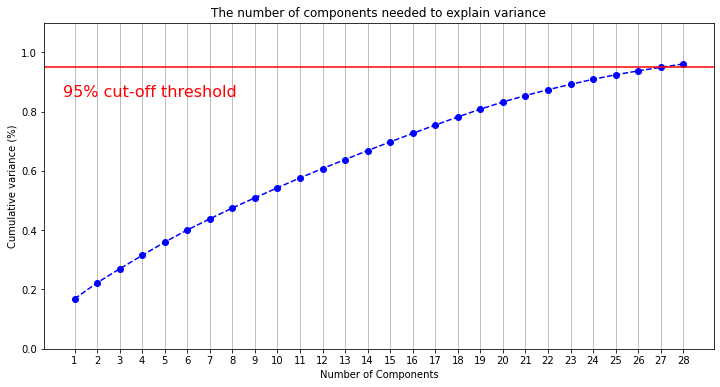

In [ ]:
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 29, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(1, 29, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()


In [ ]:
pca=PCA(n_components=27)
features_train=pca.fit_transform(features_train)
features_test=pca.transform(features_test)

In [ ]:
features_train.shape

(1792, 27)

In [ ]:
features_test.shape

(448, 27)

#**Fit the data into the model**

###**KNN**

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN

####Checking Consistency, using Cross Validation


In [ ]:
score=cross_val_score(KNN(n_neighbors=3),X=features_train,y=labels_train,cv=10)
score

array([0.81666667, 0.87777778, 0.8603352 , 0.83240223, 0.8603352 ,
       0.8547486 , 0.8547486 , 0.88268156, 0.87709497, 0.84357542])

In [ ]:
# Consistency using Mean and standard deviation in percentage
score.mean()*100,score.std()*100


(85.6036623215394, 1.9824776396169406)

###Automating the process of cross validation for different K-Neighbors


In [ ]:
def Val_score(n_neighbors):
    '''
    takes range of n_neighbors as input
    returns Mean and Standard Deviation for each value of n_neighbors
    '''
    avg=[]
    standard_d=[]
    for i in n_neighbors:
        
        # 10 fold cross validation for every value of n_neighbors
        score=cross_val_score(KNN(n_neighbors=i),X=features_train,y=labels_train,cv=10)

        #adding mean to avg list
        avg.append(score.mean())

        #adding standard deviation of std list
        standard_d.append(score.std())
    return avg, standard_d
    



In [ ]:
n_neighbors=range(1,50)
mean,std=Val_score(n_neighbors)

###Ploting Mean Validation Score for each K value


Text(0.5, 1.0, 'Mean Validation score')

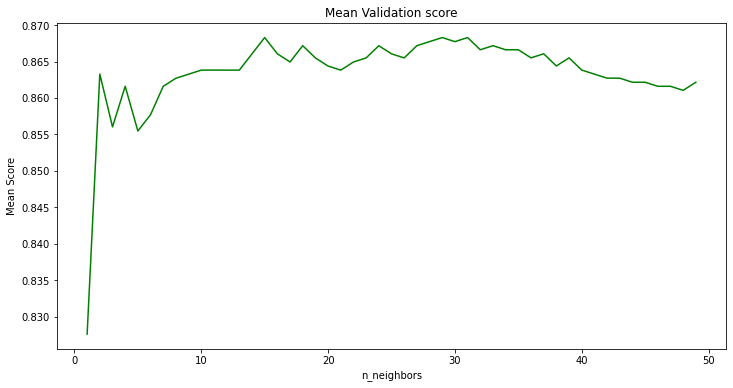

In [ ]:
plt.plot(n_neighbors,mean,color='green',label='mean')
plt.xlabel('n_neighbors')
plt.ylabel('Mean Score')
plt.title('Mean Validation score')

###Plotting Standard Deaviation Validation Score for each K value


Text(0.5, 1.0, 'Standard Deviation of Validation score')

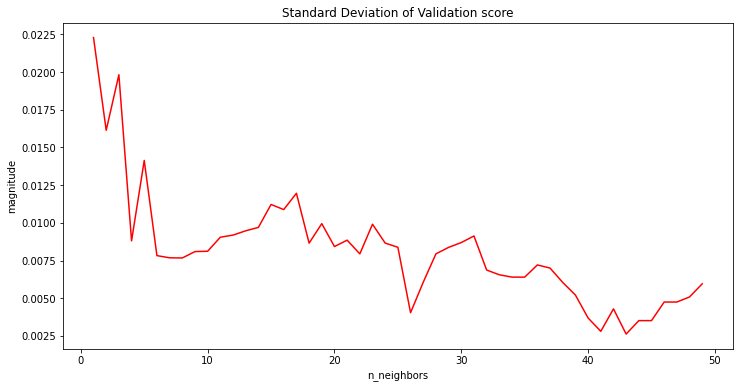

In [ ]:
plt.plot(n_neighbors,std,color='red',label='Standard deviation')
plt.xlabel('n_neighbors')
plt.ylabel('magnitude')
plt.title('Standard Deviation of Validation score')

###Trying the optimal model over test set


In [ ]:
clf=KNN(n_neighbors=15)
clf.fit(features_train,labels_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [ ]:
score1=clf.score(features_train,labels_train)

In [ ]:
score1

0.8733258928571429

In [ ]:
predknn=clf.predict(features_test)

In [ ]:
KNN_cf_matrix = confusion_matrix(labels_test, predknn)
KNN_cf_matrix

array([[371,   5],
       [ 56,  16]])

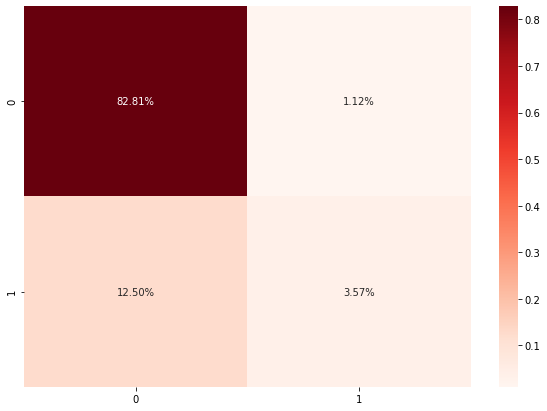

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(KNN_cf_matrix/np.sum(KNN_cf_matrix), annot=True, fmt='.2%', cmap='Reds')

#Logisticregression

In [ ]:
classifier=LogisticRegression()

In [ ]:
scores2 = cross_val_score(classifier, features_train, labels_train, scoring='accuracy', cv=10, n_jobs=-1)

In [ ]:
scores2

array([0.85      , 0.88333333, 0.8603352 , 0.87150838, 0.8603352 ,
       0.88268156, 0.88826816, 0.89944134, 0.82122905, 0.87150838])

In [ ]:
# Consistency using Mean and standard deviation in percentage
scores2.mean()*100,scores2.std()*100

(86.88640595903166, 2.120421462079257)

In [ ]:
classifier.fit(features_train,labels_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predLogistic=classifier.predict(features_test)

In [ ]:
predLogistic

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
labels_test

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,

In [ ]:
cf_matrix = confusion_matrix(labels_test, predLogistic)
cf_matrix

array([[363,  13],
       [ 49,  23]])

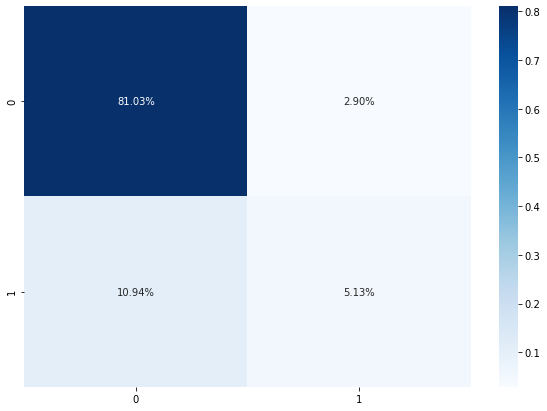

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

##SVM

In [ ]:
SVMClassifier=SVC()

In [ ]:
scores3 = cross_val_score(SVMClassifier, features_train, labels_train, scoring='accuracy', cv=10, n_jobs=-1)

In [ ]:
scores3

array([0.84444444, 0.87777778, 0.87150838, 0.87150838, 0.8603352 ,
       0.87709497, 0.88268156, 0.86592179, 0.84916201, 0.86592179])

In [ ]:
# Consistency using Mean and standard deviation in percentage
scores3.mean()*100,scores3.std()*100

(86.66356300434514, 1.1734544600214543)

In [ ]:
SVMClassifier.fit(features_train,labels_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
predSVM=SVMClassifier.predict(features_test)

In [ ]:
predSVM

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
labels_test

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,

In [ ]:
SVC_cf_matrix = confusion_matrix(labels_test, predSVM)
SVC_cf_matrix

array([[370,   6],
       [ 57,  15]])

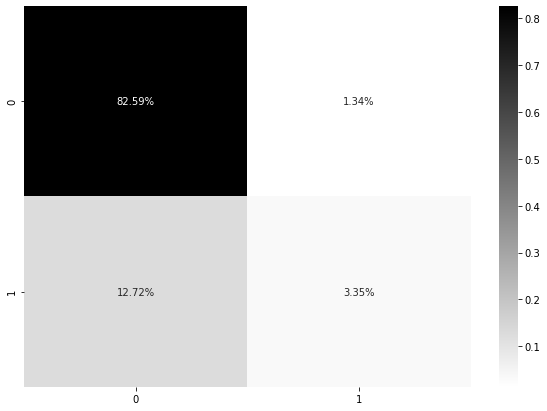

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(SVC_cf_matrix/np.sum(SVC_cf_matrix), annot=True, fmt='.2%', cmap='binary')

In [ ]:
acc_score=[]
pre_score=[]
re_score=[]
fscore=[]
l1=[predknn,predLogistic,predSVM]
for i in l1:
  acc_score.append(accuracy_score(labels_test, i))
  pre_score.append(precision_score(labels_test, i))
  re_score.append(recall_score(labels_test, i))
  fscore.append(f1_score(labels_test, i))

In [ ]:
df=pd.DataFrame()
df['model']=['KNN', 'LogisticRegressior', 'SupportVectorClassifier']
df['accuracy_score']=acc_score
df['precision_score']=pre_score
df['recall_score']=re_score
df['f1_score']=fscore

In [ ]:
df

,model,accuracy_score,precision_score,recall_score,f1_score
0,KNN,0.863839,0.761905,0.222222,0.344086
1,LogisticRegressior,0.861607,0.638889,0.319444,0.425926
2,SupportVectorClassifier,0.859375,0.714286,0.208333,0.322581


In [ ]:
file='user_offer_attraction.pkl'
pickle.dump(clf,open(file,'wb'))

In [ ]:
model_clf=pickle.load(open('user_offer_attraction.pkl','rb'))

In [ ]:
pred=model_clf.predict(features_test)

In [ ]:
pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
labels_test

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,

# Result
* As you see, we use different visualization part with different attributes and also we divided the dta to num columns and cat columns with target and non target marketting and at the end of the part, we train and test the model with 7 different algorithms and we can see the percentage which one has the best one .